### Objective: Determine how to do fft  with python

This is based on a lab that i found on line

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from os.path import join,dirname, split
import numpy.fft as fft
from matplotlib.mlab import psd

from numpy import linalg as LA
from os import listdir
from scipy.io import loadmat
from GraphingSetup import configure_plots, create_tableau_colors
%matplotlib inline
configure_plots()
tableau = create_tableau_colors()


sns.set_style('white')
#sns.set_context('talk')

We are going to explore the signal $x(t) = sin(\pi f_0t)$ where $f_0$ is a particular frequency of the signal. (its the base).

In [2]:
# set up a signal,we do one second
t = np.arange(0, 1,0.125)
xt = np.sin(2*np.pi*t)

# calculate the fft and print the fft coefficents
a = fft.fft(xt)
for i in a: 
    print np.round(i.real,1),'\t\t',np.round(i.imag,3)

0.0 		0.0
-0.0 		-4.0
0.0 		-0.0
0.0 		-0.0
0.0 		0.0
0.0 		-0.0
0.0 		0.0
0.0 		4.0


Note that the there are positive and negative imaginary numbers.These are the conjugates. 

### computing the power spectral density using mlab psd

The function [psd](http://matplotlib.org/api/mlab_api.html#matplotlib.mlab.psd) takes a signal $x(t)$ and computes the power spectral density. 

The pertinent parameters are
- x: x(t)
- Fs: The sampling frequency. samples per time unit. 
- NFFT: the number of segments. This effects how fast the algorithm goes. It is best if its a power of 2. Its the number of points per data block.  log2(len(x(t)) + 1 is the a good exponent for 2. 
- window: A function or vector that tells the algo how to window the data. Default is the hamming window. 
- sides: Whether to return the one sided or 2 sided data. 
- detrend: A function by which to detrend the data. the deualt is none. Use 'mean'

In [3]:
t = np.arange(0, 1000,0.125)
xt = np.sin(2*np.pi*t)
Pxx, freqs=psd(xt)

In [4]:
len(freqs)

129

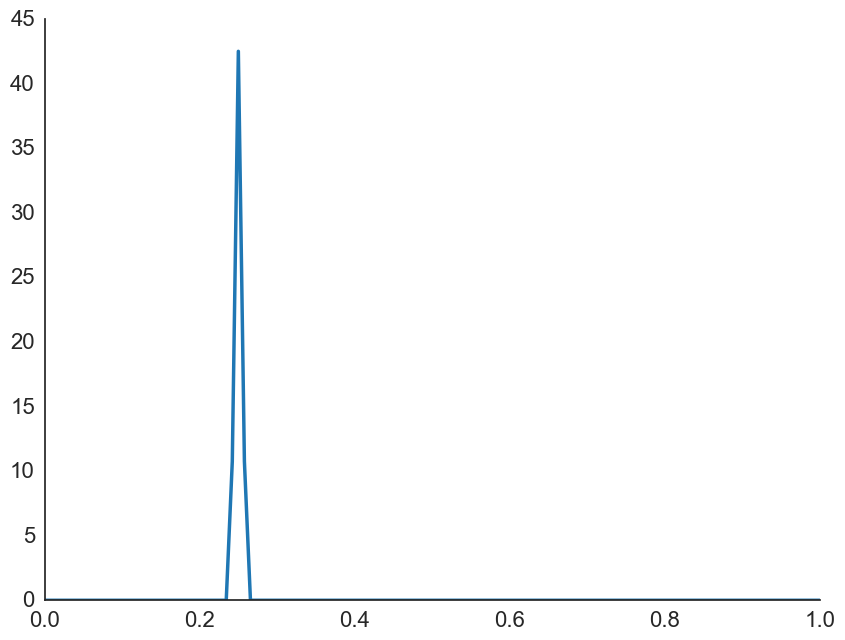

In [5]:
plt.plot(freqs,Pxx)

### Frequecny resolustion
Say we have a 4Hz sine wave (eg freq = 4/sec), we have 2010 seconds, we sample at 64 Hz (64 times)

In [20]:
sampling_rate = 64
samples = 1.0/sampling_rate
f = 4
max_time = 10
#set up the time
t = np.arange(0, max_time, samples)
xt = np.sin(2*np.pi*f*t) + 0.2*t

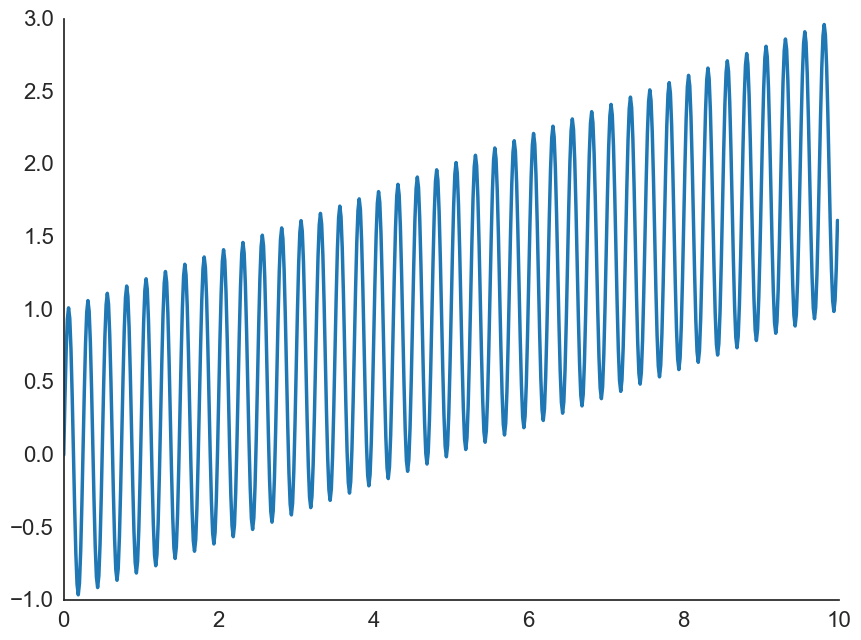

In [21]:
plt.plot(t,xt)

In [25]:
# compute the psd
Pxx, freqs=psd(xt, Fs = 64,
              detrend = 'mean')

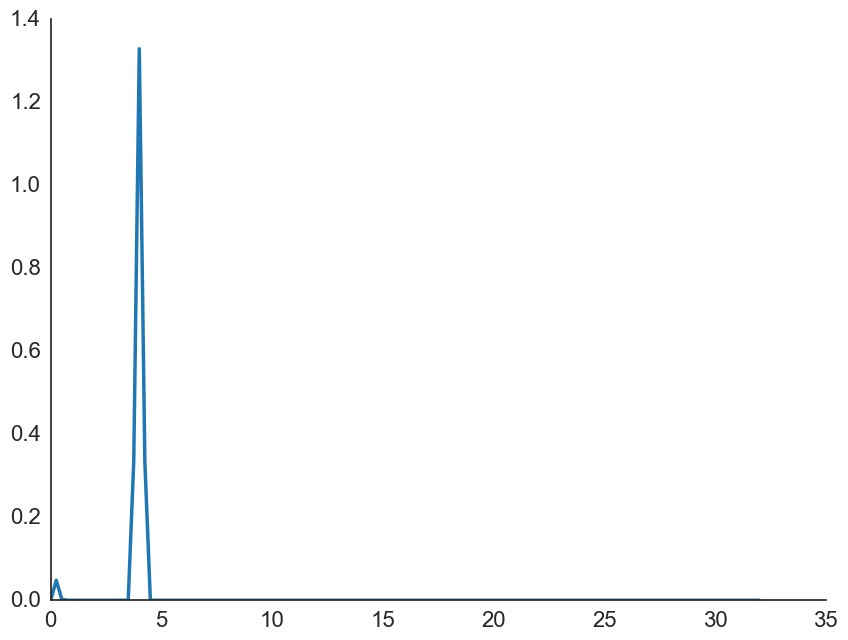

In [26]:
plt.plot(freqs,Pxx,)

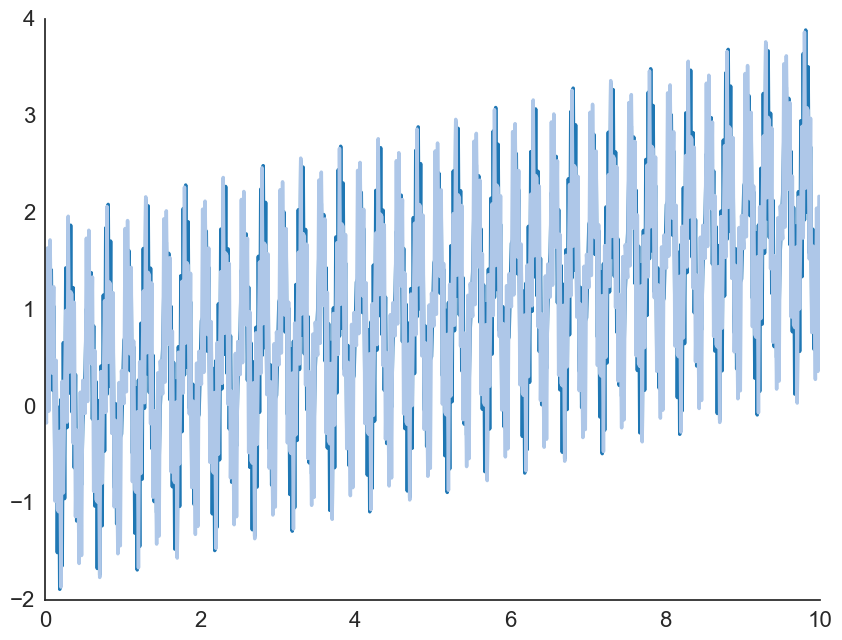

In [39]:
sampling_rate = 64
samples = 1.0/sampling_rate
f1 = 4
f2 = 31
max_time = 10
#set up the time
t = np.arange(0, max_time, samples)
xt = np.sin(2*np.pi*f1*t) + 0.2*t + np.sin(2*np.pi*f2*t)


samples = 1.0/sampling_rate
f1 = 4
f2 = 102
max_time = 10
#set up the time
t = np.arange(0, max_time, samples)
xt2 = np.sin(2*np.pi*f1*t) + 0.2*t + np.sin(2*np.pi*f2*t)


# plot it




plt.plot(t,xt)
plt.plot(t,xt2)

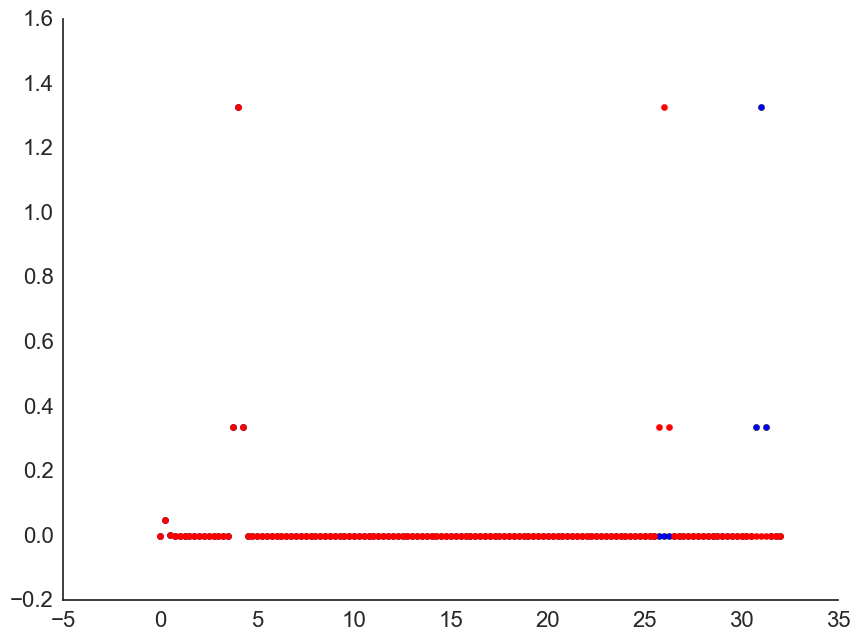

In [44]:
# compute the psd
Pxx1, freqs=psd(xt, Fs = 64,
              detrend = 'mean')

Pxx2, freqs=psd(xt2, Fs = 64,
              detrend = 'mean')
plt.scatter(freqs,Pxx)
plt.scatter(freqs,Pxx2, color ='red')

In [47]:
np.corrcoef(Pxx1,Pxx2)

array([[ 1.        ,  0.48386101],
       [ 0.48386101,  1.        ]])

In [36]:
freqs

array([  0.  ,   0.25,   0.5 ,   0.75,   1.  ,   1.25,   1.5 ,   1.75,
         2.  ,   2.25,   2.5 ,   2.75,   3.  ,   3.25,   3.5 ,   3.75,
         4.  ,   4.25,   4.5 ,   4.75,   5.  ,   5.25,   5.5 ,   5.75,
         6.  ,   6.25,   6.5 ,   6.75,   7.  ,   7.25,   7.5 ,   7.75,
         8.  ,   8.25,   8.5 ,   8.75,   9.  ,   9.25,   9.5 ,   9.75,
        10.  ,  10.25,  10.5 ,  10.75,  11.  ,  11.25,  11.5 ,  11.75,
        12.  ,  12.25,  12.5 ,  12.75,  13.  ,  13.25,  13.5 ,  13.75,
        14.  ,  14.25,  14.5 ,  14.75,  15.  ,  15.25,  15.5 ,  15.75,
        16.  ,  16.25,  16.5 ,  16.75,  17.  ,  17.25,  17.5 ,  17.75,
        18.  ,  18.25,  18.5 ,  18.75,  19.  ,  19.25,  19.5 ,  19.75,
        20.  ,  20.25,  20.5 ,  20.75,  21.  ,  21.25,  21.5 ,  21.75,
        22.  ,  22.25,  22.5 ,  22.75,  23.  ,  23.25,  23.5 ,  23.75,
        24.  ,  24.25,  24.5 ,  24.75,  25.  ,  25.25,  25.5 ,  25.75,
        26.  ,  26.25,  26.5 ,  26.75,  27.  ,  27.25,  27.5 ,  27.75,
      